# Import Statements


In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install ISLP

In [3]:
#Import Statements
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from ISLP import confusion_table
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict, StratifiedKFold

from sklearn.metrics import roc_auc_score
from ISLP.models import sklearn_sm
from sklearn.ensemble import RandomForestClassifier


In [4]:
#Importing the Data
ANSR = pd.read_csv('/content/drive/MyDrive/DSC FINAL SENIOR/ANSR TOTAL(Sheet1).csv')
SKIL = pd.read_csv('/content/drive/MyDrive/DSC FINAL SENIOR/Updated Skills(Sheet1).csv')

In [5]:
ANSR.columns

Index(['Countries and Areas', 'ISO Code', 'Region', 'Sub-region',
       'Development Regions', 'Category', 'ANAR Point Estimate Total ',
       'ANAR Upper Limit Total ', 'ANAR Lower Limit Total ',
       'ANAR Point Estimate Without', 'ANAR Upper Limit Without',
       'ANAR Lower Limit Without',
       'ANAR Point Estimate With Functional Difficulties ',
       'ANAR Upper Limit With Functional Difficulties',
       'ANAR Lower Limit With Functional Difficulties Limit', 'Data Source',
       'Time Period', 'Classification'],
      dtype='object')

# Cleaning the ANSR Dataset

In [6]:
ANSR

,Countries and Areas,ISO Code,Region,Sub-region,Development Regions,Category,ANAR Point Estimate Total,ANAR Upper Limit Total,ANAR Lower Limit Total,ANAR Point Estimate Without,ANAR Upper Limit Without,ANAR Lower Limit Without,ANAR Point Estimate With Functional Difficulties,ANAR Upper Limit With Functional Difficulties,ANAR Lower Limit With Functional Difficulties Limit,Data Source,Time Period,Classification
0,Bangladesh,BGD,SA,SA,Least Developed,Total,82.7,83.3,82.1,83.7,84.3,83.1,72.1,74.6,69.6,MICS6,2019,Primary
1,Bangladesh,BGD,SA,SA,Least Developed,Male,80.1,81.0,79.2,81.4,82.3,80.5,68.1,71.5,64.6,MICS6,2019,Primary
2,Bangladesh,BGD,SA,SA,Least Developed,Female,85.3,86.1,84.5,86.0,86.9,85.2,76.8,80.2,73.3,MICS6,2019,Primary
3,Bangladesh,BGD,SA,SA,Least Developed,Urban,84.3,85.6,82.9,84.9,86.3,83.6,76.1,81.8,70.3,MICS6,2019,Primary
4,Bangladesh,BGD,SA,SA,Least Developed,Rural,82.2,82.9,81.5,83.3,84.0,82.7,71.2,73.9,68.5,MICS6,2019,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Zimbabwe,ZWE,SSA,ESA,Less Developed,Total,7.3,10.3,4.4,7.9,11.2,4.7,NaN,NaN,NaN,MICS6,2019,Upper Secondary
476,Zimbabwe,ZWE,SSA,ESA,Less Developed,Male,6.8,10.7,2.8,7.3,11.6,3.0,NaN,NaN,NaN,MICS6,2019,Upper Secondary
477,Zimbabwe,ZWE,SSA,ESA,Less Developed,Female,8.0,12.3,3.6,8.7,13.5,3.8,NaN,NaN,NaN,MICS6,2019,Upper Secondary
478,Zimbabwe,ZWE,SSA,ESA,Less Developed,Urban,12.3,18.2,6.4,13.7,20.2,7.2,NaN,NaN,NaN,MICS6,2019,Upper Secondary


In [7]:
import pandas as pd

import pandas as pd

def create_anar_summary_dataframe(df):

    # Filter for "Without"
    df_without = df.dropna(subset=['ANAR Point Estimate Without'])
    df_without = df_without.rename(columns={
        'ANAR Point Estimate Without': 'Point Estimate',
        'ANAR Upper Limit Without': 'Upper Limit',
        'ANAR Lower Limit Without': 'Lower Limit'
    })
    df_without['Functional Difficulties'] = 'Without'

    # Filter for "With"
    df_with = df.dropna(subset=['ANAR Point Estimate With Functional Difficulties '])
    df_with = df_with.rename(columns={
        'ANAR Point Estimate With Functional Difficulties ': 'Point Estimate',
        'ANAR Upper Limit With Functional Difficulties': 'Upper Limit',
        'ANAR Lower Limit With Functional Difficulties Limit': 'Lower Limit'
    })
    df_with['Functional Difficulties'] = 'With'

    # combineing the Datasets
    df_combined = pd.concat([df_without, df_with], ignore_index=True)


    new_df = df_combined[[
        'Countries and Areas', 'ISO Code', 'Region', 'Sub-region',
        'Development Regions', 'Category', 'Functional Difficulties',
        'Point Estimate', 'Upper Limit', 'Lower Limit', 'Data Source',
        'Time Period', 'Classification'
    ]]

    new_df = new_df[
        (new_df['Point Estimate'].notna()) &
        (new_df['Point Estimate'] != 0.0) &
        (new_df['Countries and Areas'] != 'Belarus')
    ]


    count_without = (new_df['Functional Difficulties'] == 'Without').sum()
    count_with = (new_df['Functional Difficulties'] == 'With').sum()

    min_count = min(count_without, count_with)

    df_without_filtered = new_df[new_df['Functional Difficulties'] == 'Without'].sample(n=min_count, random_state=42)
    df_with_filtered = new_df[new_df['Functional Difficulties'] == 'With'].sample(n=min_count, random_state=42)

    new_df = pd.concat([df_without_filtered, df_with_filtered], ignore_index=True)

    return new_df


In [8]:
new_anar_df = create_anar_summary_dataframe(ANSR)
new_anar_df = new_anar_df[ (new_anar_df['Point Estimate'].notna()) &  # Check for NaN first
        (new_anar_df['Point Estimate'] != 0.0) &
        (new_anar_df['Countries and Areas'] != 'Belarus')]

In [9]:
df_filtered = new_anar_df[new_anar_df['Category'].isin(['Male', 'Female'])]

# Display the filtered Dataset
print(df_filtered)

    Countries and Areas ISO Code Region Sub-region Development Regions  \
2              Mongolia      MNG    EAP        EAP      Less Developed   
3            Madagascar      MDG    SSA        ESA     Least Developed   
7            Madagascar      MDG    SSA        ESA     Least Developed   
8          Turkmenistan      TKM    ECA       EECA      Less Developed   
10              Tunisia      TUN   MENA       MENA      Less Developed   
..                  ...      ...    ...        ...                 ...   
592               Ghana      GHA    SSA        WCA      Less Developed   
596               Samoa      WSM    EAP        EAP      Less Developed   
597            Suriname      SUR    LAC        LAC      Less Developed   
602               Nepal      NPL     SA         SA     Least Developed   
603            Suriname      SUR    LAC        LAC      Less Developed   

    Category Functional Difficulties  Point Estimate  Upper Limit  \
2     Female                 Without      

In [10]:
df_filtered
df_filtered = pd.get_dummies(df_filtered, columns=['Category'], dtype=int)
y = df_filtered['Functional Difficulties']
X = df_filtered.drop(['Functional Difficulties', 'Countries and Areas', 'ISO Code', 'Region', 'Sub-region','Development Regions', 'Data Source', 'Time Period', 'Classification'], axis =1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 2 to 603
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Point Estimate   230 non-null    float64
 1   Upper Limit      230 non-null    float64
 2   Lower Limit      230 non-null    float64
 3   Category_Female  230 non-null    int64  
 4   Category_Male    230 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 10.8 KB


# Logistic Regression for ANSR

In [11]:
#Create Logistic Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
X_train

,Point Estimate,Upper Limit,Lower Limit,Category_Female,Category_Male
403,95.5,99.1,91.9,1,0
144,70.5,76.1,64.9,0,1
436,91.6,98.8,84.5,1,0
174,97.7,98.9,96.5,0,1
446,76.8,80.2,73.3,1,0
...,...,...,...,...,...
283,24.5,30.1,18.8,1,0
33,95.1,96.6,93.7,1,0
237,22.2,24.5,19.9,0,1
477,79.2,82.1,76.2,0,1


In [13]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.782608695652174


In [14]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_test_numeric = y_test.map({'Without': 1, 'With': 0})

In [15]:
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_proba)
roc_auc = auc(fpr, tpr)

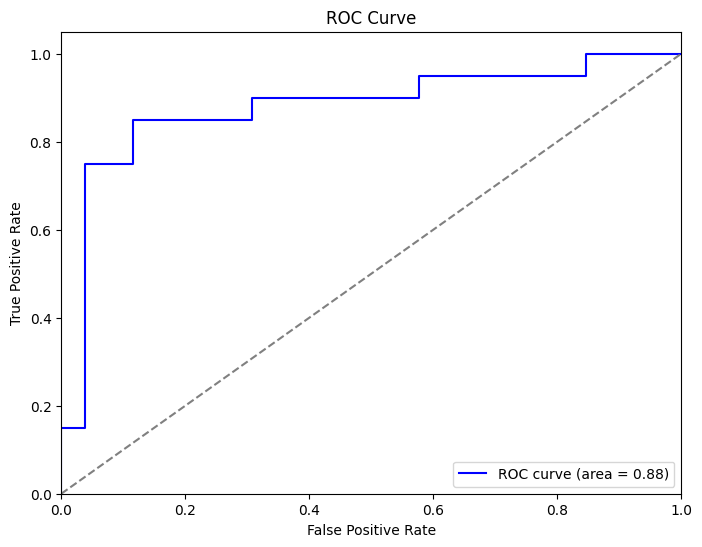

In [16]:

#Graph ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title( 'ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
#ROC Score
ns_auc = roc_auc_score(y_test, y_pred_proba)
ns_auc

0.8788461538461538

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

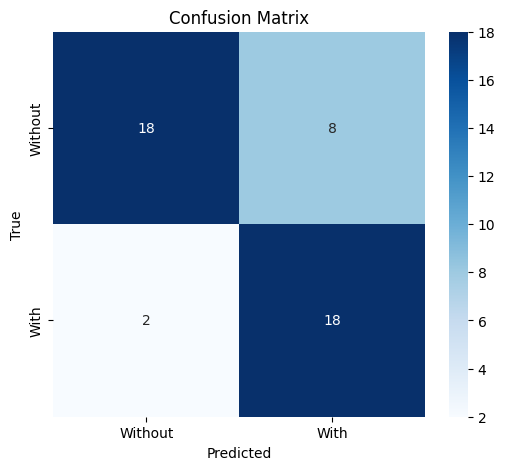

In [22]:
conf_matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Without', 'With'], yticklabels=['Without', 'With'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
logr = LogisticRegression(random_state=42)
logr.fit(X_train, y_train)
score = logr.score(X_test, y_test)
print(score)
print("")
log_pred = logr.predict(X_test)
logexport_prob = logr.predict_proba(X_test)
print(confusion_matrix(y_test, log_pred))
print("")
print(classification_report(y_test, log_pred))

0.782608695652174

[[18  8]
 [ 2 18]]

              precision    recall  f1-score   support

        With       0.90      0.69      0.78        26
     Without       0.69      0.90      0.78        20

    accuracy                           0.78        46
   macro avg       0.80      0.80      0.78        46
weighted avg       0.81      0.78      0.78        46



# Cross Validation for Logistic Regression

In [24]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logr, X, y, cv=5,
scoring='roc_auc')
print(cv_scores)


[0.75803403 0.92816635 0.73913043 0.74102079 0.81060606]


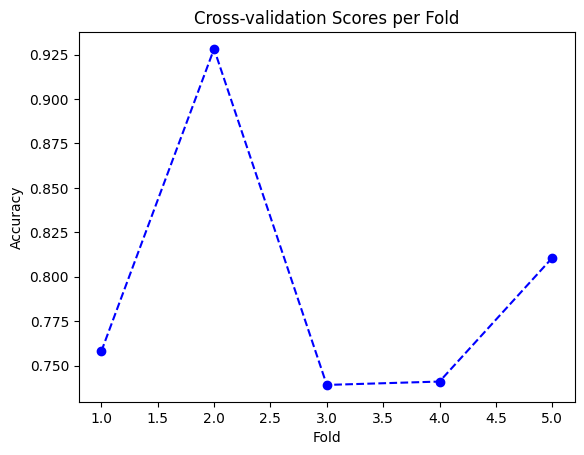

In [25]:

#Ploting the Cross-Validation Scores for Logistic Regression Model
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores per Fold')
plt.show()

# Random Forest for ANSR

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [27]:
df_loan_results = pd.concat([X_test, y_test], axis = 1 )

In [28]:
df_loan_results = df_loan_results.reset_index()

In [29]:
#Random Forest Model
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(score)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

0.6231884057971014
              precision    recall  f1-score   support

        With       0.65      0.61      0.63        36
     Without       0.60      0.64      0.62        33

    accuracy                           0.62        69
   macro avg       0.62      0.62      0.62        69
weighted avg       0.62      0.62      0.62        69

[[22 14]
 [12 21]]


In [30]:
cm_rf = pd.DataFrame(confusion_matrix(y_test, rf_pred))
cm_rf=cm_rf.rename(columns = {0:'pred_More1', \
                        1:'pred_1andDone'})
cm_rf['Score'] = score
cm_rf['Type'] = 'rf_sc'
cm_rf
cm =  cm_rf
cm

,pred_More1,pred_1andDone,Score,Type
0,22,14,0.623188,rf_sc
1,12,21,0.623188,rf_sc


In [31]:
df_fi = pd.DataFrame(rf.feature_importances_)

X_names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([df_fi, X_names], axis = 1)
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp[df_feat_imp['Importance']!=0].sort_values('Importance', ascending = False).head(20)


,Importance,Features
2,0.346334,Lower Limit
1,0.317418,Upper Limit
0,0.306008,Point Estimate
4,0.017646,Category_Male
3,0.012594,Category_Female


# Cleaning Data for the Skills Dataset

In [32]:
SKIL.columns

Index(['Countries and Areas', 'ISO Code', 'Region', 'Sub-region',
       'Development Regions', 'Category',
       'Foundational Reading Skill Point Estimate Total',
       'Foundational Reading Skill Upper Limit Total',
       ' Foundational Reading Skill Lower Limit Total',
       'Foundational Reading Skill Point Estimate Without',
       'Foundational Reading Skill Upper Limit Without',
       'Foundational Reading Skill Lower Limit Without',
       'Foundational Reading Skill Point Estimate With Functional Difficulties',
       'Foundational Reading Skill Upper Limit With Functional Difficulties',
       'Foundational Reading Skill Lower Limit With Functional Difficulties',
       'Data Source', 'Time Period',
       'Foundational Numeracy Skill Point Estimate Total',
       'Foundational Numeracy Skill Upper Limit Total',
       'Foundational Numeracy Skill Lower Limit Total',
       'Foundational Numeracy Skill Point Estimate Without',
       'Foundational Numeracy Skill Upper L

In [33]:


def create_foundational_skills_summary_dataframe(df):

    # Define required columns for "Without" and "With" functional difficulties
    without_columns = {
        'Foundational Reading Skill Point Estimate Without': 'Reading Point Estimate',
        'Foundational Reading Skill Upper Limit Without': 'Reading Upper Limit',
        'Foundational Reading Skill Lower Limit Without': 'Reading Lower Limit',
        'Foundational Numeracy Skill Point Estimate Without': 'Numeracy Point Estimate',
        'Foundational Numeracy Skill Upper Limit Without': 'Numeracy Upper Limit',
        'Foundational Numeracy Skill Lower Limit Without': 'Numeracy Lower Limit'
    }

    with_columns = {
        'Foundational Reading Skill Point Estimate With Functional Difficulties': 'Reading Point Estimate',
        'Foundational Reading Skill Upper Limit With Functional Difficulties': 'Reading Upper Limit',
        'Foundational Reading Skill Lower Limit With Functional Difficulties': 'Reading Lower Limit',
        'Foundational Numeracy Skill Point Estimate With Functional Difficulties': 'Numeracy Point Estimate',
        'Foundational Numeracy Skill Upper Limit With Functional Difficulties': 'Numeracy Upper Limit',
        'Foundational Numeracy Skill Lower Limit With Functional Difficulties': 'Numeracy Lower Limit'
    }

    # Check for missing columns
    missing_without = [col for col in without_columns if col not in df.columns]
    missing_with = [col for col in with_columns if col not in df.columns]

    if missing_without:
        print(f"Warning: Missing columns for 'Without' functional difficulties: {missing_without}")
        df_without = pd.DataFrame()
    else:
        df_without = df.dropna(subset=without_columns.keys()).rename(columns=without_columns)
        df_without['Functional Difficulties'] = 'Without'

    if missing_with:
        print(f"Warning: Missing columns for 'With' functional difficulties: {missing_with}")
        df_with = pd.DataFrame()
    else:
        df_with = df.dropna(subset=with_columns.keys()).rename(columns=with_columns)
        df_with['Functional Difficulties'] = 'With'

    df_combined = pd.concat([df_without, df_with], ignore_index=True)

    final_columns = [
        'Countries and Areas', 'ISO Code', 'Region', 'Sub-region', 'Development Regions',
        'Category', 'Functional Difficulties', 'Reading Point Estimate', 'Reading Upper Limit',
        'Reading Lower Limit', 'Numeracy Point Estimate', 'Numeracy Upper Limit',
        'Numeracy Lower Limit', 'Data Source', 'Time Period'
    ]

    df_combined = df_combined[final_columns]

    df_combined = df_combined.dropna(subset=['Reading Point Estimate', 'Numeracy Point Estimate'])
    df_combined = df_combined[
        (df_combined['Reading Point Estimate'] != 0.0) &
        (df_combined['Numeracy Point Estimate'] != 0.0) &
        (df_combined['Countries and Areas'] != 'Belarus')
    ]

    count_without = (df_combined['Functional Difficulties'] == 'Without').sum()
    count_with = (df_combined['Functional Difficulties'] == 'With').sum()
    min_count = min(count_without, count_with)

    if min_count > 0:
        df_without_filtered = df_combined[df_combined['Functional Difficulties'] == 'Without'].sample(n=min_count, random_state=42)
        df_with_filtered = df_combined[df_combined['Functional Difficulties'] == 'With'].sample(n=min_count, random_state=42)
        df_combined = pd.concat([df_without_filtered, df_with_filtered], ignore_index=True)
    else:
        print("Warning: Insufficient data to balance 'With' and 'Without' samples.")

    return df_combined


In [34]:
Skills = create_foundational_skills_summary_dataframe(SKIL)

In [35]:
Skills

,Countries and Areas,ISO Code,Region,Sub-region,Development Regions,Category,Functional Difficulties,Reading Point Estimate,Reading Upper Limit,Reading Lower Limit,Numeracy Point Estimate,Numeracy Upper Limit,Numeracy Lower Limit,Data Source,Time Period
0,Nepal,NPL,SA,SA,Least Developed,Urban,Without,42.1,44.1,40.0,41.6,43.6,39.6,MICS6,2019
1,Democratic Republic of the Congo,COD,SSA,WCA,Least Developed,Urban,Without,16.6,18.3,15.0,1.1,1.5,0.6,MICS6,2017-2018
2,Turks and Caicos Islands,TCA,LAC,LAC,Not Classified,Urban,Without,78.4,84.3,72.6,63.7,70.5,56.8,MICS6,2019-2020
3,North Macedonia,MKD,ECA,EECA,More Developed,Urban,Without,70.5,75.5,65.5,42.2,47.6,36.9,MICS6,2018-2019
4,North Macedonia,MKD,ECA,EECA,More Developed,Male,Without,58.1,63.4,52.8,45.8,51.2,40.4,MICS6,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Suriname,SUR,LAC,LAC,Less Developed,Total,With,34.5,40.1,28.8,18.0,22.5,13.4,MICS6,2018
254,Chad,TCD,SSA,WCA,Least Developed,Rural,With,2.5,3.2,1.8,5.8,6.8,4.7,MICS6,2019
255,Sao Tome and Principe,STP,SSA,WCA,Least Developed,Male,With,21.6,28.6,14.7,24.2,31.4,16.9,MICS8,2019
256,Kyrgyzstan,KGZ,ECA,EECA,Less Developed,Female,With,54.1,65.1,43.0,55.7,66.7,44.7,MICS6,2018


In [36]:
df_filtered_Skills = Skills[Skills['Category'].isin(['Male', 'Female'])]
df_filtered_Skills = pd.get_dummies(df_filtered_Skills, columns=['Category'], dtype=int)


# Combining the two datasets

In [37]:
# Importing the new Dataset
df_filtered = pd.read_csv('/content/drive/MyDrive/DSC FINAL SENIOR/COMPETE SKills and ANAR(Sheet1).csv')

In [38]:
df_filtered.to_csv('Updateded.csv', index=False)

In [39]:
df_filtered.columns

Index(['Countries and Areas', 'ISO Code', 'Region', 'Sub-region',
       'Development Regions', 'Functional Difficulties',
       'Reading Point Estimate', 'Reading Upper Limit', 'Reading Lower Limit',
       'Numeracy Point Estimate', 'Numeracy Upper Limit',
       'Numeracy Lower Limit', 'Data Source', 'Time Period', 'Category_Female',
       'Category_Male', 'Updated_ANAR.ANAR Point Estimate',
       'Updated_ANAR.ANAR Upper Limit', 'Updated_ANAR.ANAR Lower Limit'],
      dtype='object')

# Logestic Regression for Combine Dataset

In [40]:
y = df_filtered['Functional Difficulties']
X = df_filtered.drop(['Functional Difficulties', 'Countries and Areas', 'ISO Code', 'Region', 'Sub-region','Development Regions', 'Data Source', 'Time Period'], axis =1)


In [41]:
X

,Reading Point Estimate,Reading Upper Limit,Reading Lower Limit,Numeracy Point Estimate,Numeracy Upper Limit,Numeracy Lower Limit,Category_Female,Category_Male,Updated_ANAR.ANAR Point Estimate,Updated_ANAR.ANAR Upper Limit,Updated_ANAR.ANAR Lower Limit
0,58.1,63.4,52.8,45.8,51.2,40.4,0,1,98.9,100.2,97.7
1,58.1,63.4,52.8,45.8,51.2,40.4,0,1,87.5,93.3,81.7
2,64.1,66.2,62.1,48.4,50.6,46.3,1,0,93.6,94.8,92.4
3,11.9,13.6,10.2,9.2,10.7,7.7,0,1,67.5,70.1,64.8
4,11.9,13.6,10.2,9.2,10.7,7.7,0,1,7.2,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...
191,12.1,14.9,9.3,7.2,9.5,4.9,1,0,41.5,48.6,34.4
192,56.4,65.5,47.2,35.5,44.3,26.7,1,0,89.1,95.0,83.1
193,34.7,42.6,26.9,16.8,22.9,10.6,0,1,39.8,51.0,28.5
194,33.6,39.1,28.2,29.6,34.9,24.3,1,0,74.2,79.9,68.4


In [42]:
#Logisitc Regrssion Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
X_train

,Reading Point Estimate,Reading Upper Limit,Reading Lower Limit,Numeracy Point Estimate,Numeracy Upper Limit,Numeracy Lower Limit,Category_Female,Category_Male,Updated_ANAR.ANAR Point Estimate,Updated_ANAR.ANAR Upper Limit,Updated_ANAR.ANAR Lower Limit
5,20.7,22.2,19.1,6.7,7.6,5.7,0,1,12.5,15.1,10.0
65,9.9,10.9,8.8,0.5,0.8,0.3,1,0,34.5,37.3,31.6
136,48.2,57.8,38.5,10.4,16.3,4.5,1,0,91.6,98.8,84.5
97,36.9,42.8,31.0,36.8,42.6,30.9,0,1,93.0,97.0,89.1
168,40.7,44.2,37.2,25.2,28.3,22.1,1,0,58.5,64.0,53.1
...,...,...,...,...,...,...,...,...,...,...,...
106,12.1,14.9,9.3,7.2,9.5,4.9,1,0,12.7,18.2,7.2
14,74.6,79.1,70.0,36.4,41.5,31.4,1,0,79.0,86.0,72.0
92,58.5,64.4,52.6,18.3,22.9,13.7,1,0,94.5,97.4,91.5
179,32.6,37.7,27.5,37.5,42.8,32.3,0,1,36.3,44.2,28.4


In [44]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [45]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_test_numeric = y_test.map({'Without': 1, 'With': 0})

In [46]:
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_proba)
roc_auc = auc(fpr, tpr)

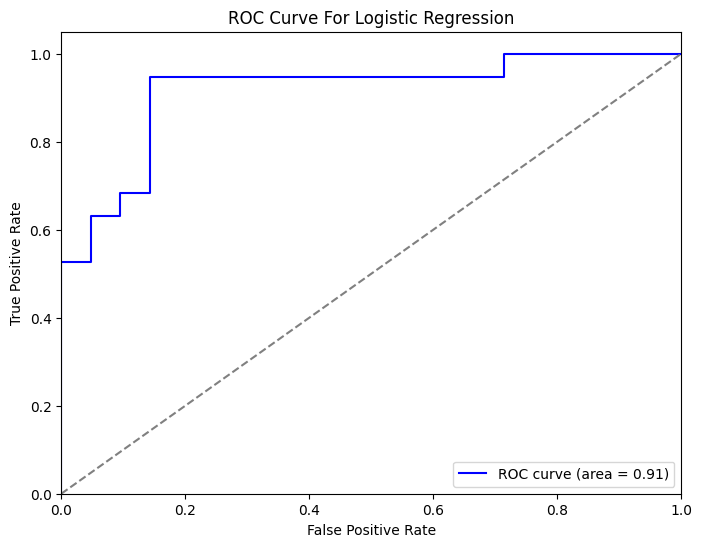

In [47]:
#ROC Curve Plot for Logestic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title( 'ROC Curve For Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [48]:
ns_auc = roc_auc_score(y_test, y_pred_proba)
ns_auc

0.9147869674185464

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)

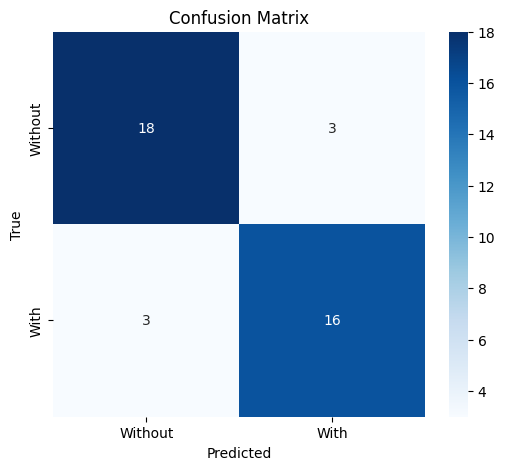

In [51]:
conf_matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Without', 'With'], yticklabels=['Without', 'With'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
logr = LogisticRegression(random_state=42)
logr.fit(X_train, y_train)
score = logr.score(X_test, y_test)
print(score)
print("")
log_pred = logr.predict(X_test)
logexport_prob = logr.predict_proba(X_test)
print(confusion_matrix(y_test, log_pred))
print("")
print(classification_report(y_test, log_pred))

# Cross Validation for Logistic Regression for Combine Dataset

In [ ]:
#Cross Validation for Logesitc Regression
cv_scores = cross_val_score(logr, X, y, cv=5,
scoring='roc_auc')
print(cv_scores)


In [ ]:
#Cross Validation plot for Logetic Regression
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores per Fold for Logistic Regression')
plt.show()

# Random Forest for combine Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
df_loan_results = pd.concat([X_test, y_test], axis = 1 )

In [ ]:
df_loan_results = df_loan_results.reset_index()

In [ ]:
df_loan_results.head()

In [ ]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)



X_test_sc = scaler.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [ ]:
#Random Forest Model
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(score)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

In [ ]:
#Confustion Matrix for Random Forest
cm_rf = pd.DataFrame(confusion_matrix(y_test, rf_pred))
cm_rf=cm_rf.rename(columns = {0:'pred_More1', \
                        1:'pred_1andDone'})
cm_rf['Score'] = score
cm_rf['Type'] = 'rf'
cm_rf
cm = pd.concat([cm, cm_rf], axis=0)
cm

In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(X_train_sc, y_train)
score = rf.score(X_test_sc, y_test)
print(score)
rf_pred = rf.predict(X_test_sc)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

In [ ]:
cm_rf = pd.DataFrame(confusion_matrix(y_test, rf_pred))
cm_rf=cm_rf.rename(columns = {0:'pred_More1', \
                        1:'pred_1andDone'})
cm_rf['Score'] = score
cm_rf['Type'] = 'rf_sc'
cm_rf
cm = pd.concat([cm, cm_rf], axis=0)
cm

In [ ]:
df_fi = pd.DataFrame(rf.feature_importances_)

# Get feature names from X
X_names = pd.DataFrame(list(X.columns))

# Concatenate importances and feature names
df_feat_imp = pd.concat([df_fi, X_names], axis=1)
df_feat_imp.columns = ['Importance', 'Features']

# Filter out features with zero importance and sort descending (take the top 20)
df_feat_imp_sorted = df_feat_imp[df_feat_imp['Importance'] != 0].sort_values('Importance', ascending=False).head(20)

# Display the sorted DataFrame (optional)
print(df_feat_imp_sorted)

# Plotting the feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_feat_imp_sorted, x='Importance', y='Features')
plt.title("Feature Importances for Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state = 42, n_estimators = 10, max_depth = 20, max_features=3)
rf = rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(score)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

# ROC Curve for Random Forest for Combine Dataset

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_test_numeric = y_test.map({'Without': 1, 'With': 0})

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_proba)
roc_auc = auc(fpr, tpr)

In [ ]:
#ROC Curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title( 'ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cm_opt = pd.DataFrame(confusion_matrix(y_test, rf_pred))
cm_opt=cm_opt.rename(columns = {0:'pred_More1', \
                        1:'pred_1andDone'})
cm_opt['Score'] = score
cm_opt['Type'] = 'rf_opt'
cm = pd.concat([cm, cm_opt], axis=0)
cm